## **Dome Paradox Simulation**

### **Introduction**
The Dome Paradox, first proposed by John D. Norton, challenges the determinism of classical mechanics. It describes a particle resting at the apex of a frictionless, radially symmetric dome. The system's equations of motion allow for the possibility of the particle remaining stationary indefinitely or spontaneously moving without any external cause—a surprising and counterintuitive behavior.

This simulation visualizes the Dome Paradox and explores its implications in the context of the \( \mathcal{I}_{\text{max}} \) principle, which balances stored complexity (\( S \)) and dynamic adaptability (\( \Delta S / \Delta t \)) to optimize the flow of information. The paradox highlights how imperfections, such as tiny perturbations, are essential for initiating flow and evolution in a system.

### **Purpose of the Simulation**
The goal of this simulation is to:
1. **Visualize Indeterminism**: Show the particle's behavior when starting from rest, both with and without small perturbations.
2. **Illustrate Imperfection’s Role**: Demonstrate how imperfections trigger motion and enable dynamic flow.
3. **Connect to \( \mathcal{I}_{\text{max}} \)**: Provide a concrete example of how stored complexity (initial conditions, dome shape) interacts with dynamic adaptability (response to perturbations) to drive system evolution.
4. **Compare Behaviors**:
   - A system at perfect balance remains static, with no information flow.
   - A perturbed system evolves dynamically, demonstrating the necessity of imperfection for flow and change.

### **What the Simulation Does**
1. **Equations of Motion**:
   - Simulates the particle's motion governed by the equation \( \frac{\mathrm{d}^2 r}{\mathrm{d} t^2} = r^n \), where \( n = 2 \) corresponds to the dome's shape (\( h(r) = -r^3/3 \)).

2. **Initial Conditions**:
   - Starts with \( r = 0 \), \( \dot{r} = 0 \) (no motion).
   - Adds small perturbations (\( r \neq 0 \)) to explore sensitivity to initial conditions.

3. **Visual Outputs**:
   - **Position vs. Time**: Compare motion with and without perturbations.
   - **Phase Space**: Visualize velocity (\( \dot{r} \)) vs. position (\( r \)) to reveal the system's dynamics.
   - **Energy Evolution**: Track potential and kinetic energy to illustrate stored complexity and flow.

4. **Extended Time Frame**:
   - The simulation runs for an extended duration (\( t_{\text{max}} = 50 \)) to better capture long-term dynamics and flow.

### **Key Insights**
This simulation reveals:
- **Static Perfection**: A perfectly balanced system (no perturbations) remains inert, illustrating that perfection prevents flow and evolution.
- **Dynamic Imperfection**: Even tiny perturbations introduce motion, breaking stasis and enabling adaptability.
- **Indeterminism in Action**: The system’s behavior highlights the breakdown of determinism in classical mechanics and the necessity of imperfection for dynamic systems.

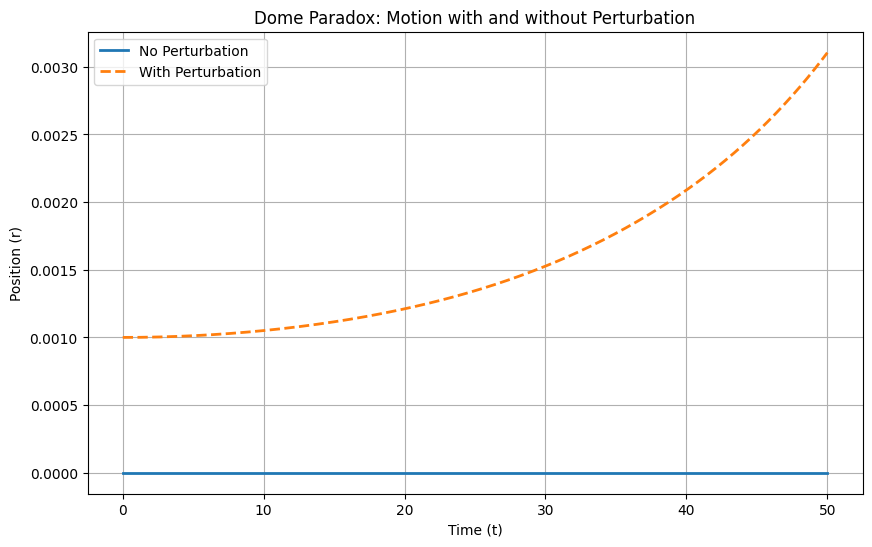

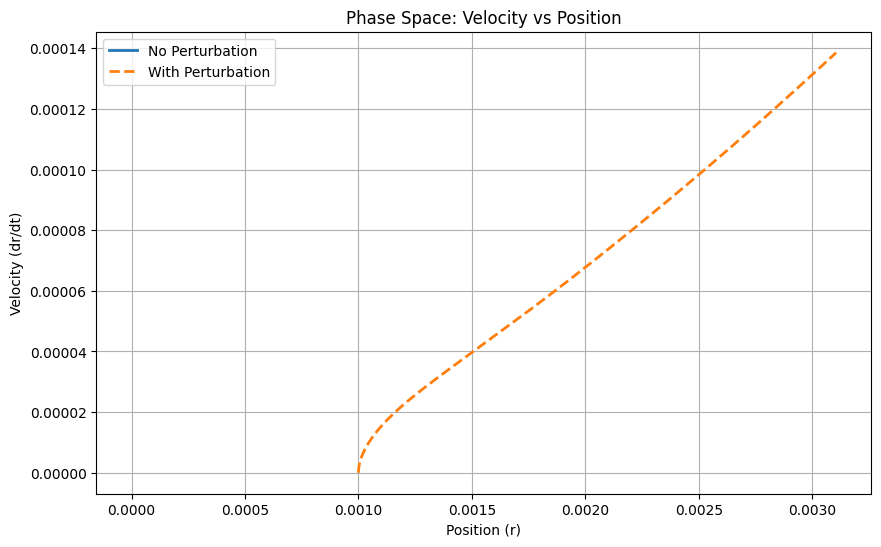

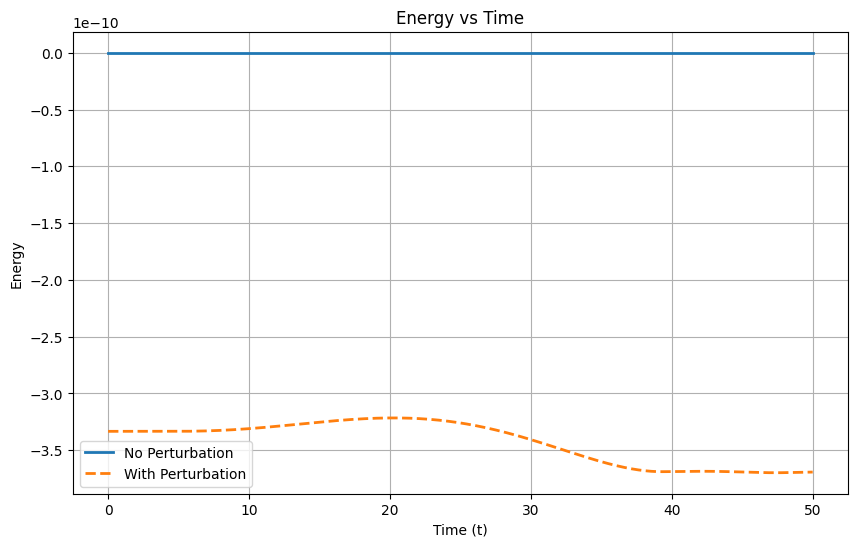

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Equation of motion: d²r/dt² = r^n
def dome_motion(t, y, n):
    r, dr_dt = y  # r = position, dr_dt = velocity
    d2r_dt2 = r**n
    return [dr_dt, d2r_dt2]

# Parameters
n = 2  # Shape parameter
t_max = 50  # Simulation time
initial_conditions = [0.0, 0.0]  # [r, dr/dt] starting at rest

# Add a small perturbation to explore sensitivity
perturbed_conditions = [0.001, 0.0]

# Solve the system with and without perturbation
time_span = (0, t_max)
sol_no_perturb = solve_ivp(dome_motion, time_span, initial_conditions, args=(n,), t_eval=np.linspace(0, t_max, 1000))
sol_with_perturb = solve_ivp(dome_motion, time_span, perturbed_conditions, args=(n,), t_eval=np.linspace(0, t_max, 1000))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sol_no_perturb.t, sol_no_perturb.y[0], label='No Perturbation', lw=2)
plt.plot(sol_with_perturb.t, sol_with_perturb.y[0], label='With Perturbation', lw=2, linestyle='--')
plt.title('Dome Paradox: Motion with and without Perturbation')
plt.xlabel('Time (t)')
plt.ylabel('Position (r)')
plt.legend()
plt.grid()
plt.show()


# Phase space plot
plt.figure(figsize=(10, 6))
plt.plot(sol_no_perturb.y[0], sol_no_perturb.y[1], label='No Perturbation', lw=2)
plt.plot(sol_with_perturb.y[0], sol_with_perturb.y[1], label='With Perturbation', lw=2, linestyle='--')
plt.title('Phase Space: Velocity vs Position')
plt.xlabel('Position (r)')
plt.ylabel('Velocity (dr/dt)')
plt.legend()
plt.grid()
plt.show()


def energy(r, dr_dt, n):
    potential = -r**(n + 1) / (n + 1)
    kinetic = 0.5 * dr_dt**2
    return potential + kinetic

energy_no_perturb = energy(sol_no_perturb.y[0], sol_no_perturb.y[1], n)
energy_with_perturb = energy(sol_with_perturb.y[0], sol_with_perturb.y[1], n)

# Energy plot
plt.figure(figsize=(10, 6))
plt.plot(sol_no_perturb.t, energy_no_perturb, label='No Perturbation', lw=2)
plt.plot(sol_with_perturb.t, energy_with_perturb, label='With Perturbation', lw=2, linestyle='--')
plt.title('Energy vs Time')
plt.xlabel('Time (t)')
plt.ylabel('Energy')
plt.legend()
plt.grid()
plt.show()



# Double Pendulum Simulation
The double pendulum exhibits chaotic behavior, where small changes in initial conditions can result in vastly different trajectories over time. This notebook explores the double pendulum's dynamics, visualizations, and how its behavior illustrates key concepts like \( \mathcal{I}_{\text{max}} \).


## Mathematical Framework
The double pendulum consists of two masses connected by rods. Its motion is governed by coupled, nonlinear differential equations:

$$
\frac{\mathrm{d}^2 \theta_1}{\mathrm{d}t^2} = f_1(\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2), \quad
\frac{\mathrm{d}^2 \theta_2}{\mathrm{d}t^2} = f_2(\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2).
$$

This system is highly sensitive to initial conditions, making it a classic example of chaotic dynamics.


In [9]:
# Define equations of motion
def equations_of_motion(t, y):
    theta1, z1, theta2, z2 = y
    delta_theta = theta2 - theta1
    denominator = (2 * m1 + m2 - m2 * np.cos(2 * delta_theta))
    dz1_dt = (-g * (2 * m1 + m2) * np.sin(theta1) 
              - m2 * g * np.sin(theta1 - 2 * theta2)
              - 2 * np.sin(delta_theta) * m2 
              * (z2**2 * L2 + z1**2 * L1 * np.cos(delta_theta))) / (L1 * denominator)
    dz2_dt = (2 * np.sin(delta_theta) 
              * (z1**2 * L1 * (m1 + m2) 
              + g * (m1 + m2) * np.cos(theta1)
              + z2**2 * L2 * m2 * np.cos(delta_theta))) / (L2 * denominator)
    return [z1, dz1_dt, z2, dz2_dt]

## Simulating the Double Pendulum
This cell numerically solves the double pendulum's equations of motion using the `scipy.integrate.solve_ivp` function. The solution is computed for a set of initial conditions over a specified time period.


In [10]:
# Initial conditions
y0 = [np.pi / 2, 0, np.pi / 2, 0]  # [theta1, dtheta1/dt, theta2, dtheta2/dt]
t_eval = np.linspace(0, 50, 5000)  # Time array
solution = solve_ivp(equations_of_motion, [0, 50], y0, t_eval=t_eval)

# Extract results
theta1, z1 = solution.y[0], solution.y[1]
theta2, z2 = solution.y[2], solution.y[3]

# Convert to Cartesian coordinates
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)


## Animation of Double Pendulum Motion
This animation visualizes the chaotic motion of the double pendulum in real time. The red trail highlights the trajectory of the second pendulum mass, showing the irregular, non-repeating behavior characteristic of chaotic systems.


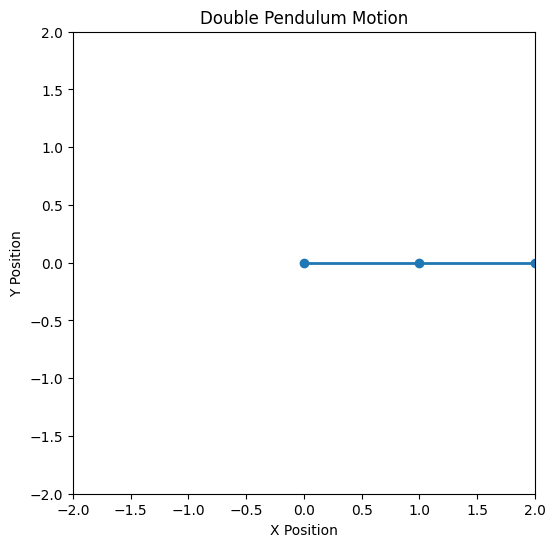

In [11]:
from matplotlib.animation import FuncAnimation

# Create animation
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
ax.set_title('Double Pendulum Motion')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')

line, = ax.plot([], [], 'o-', lw=2)
trail, = ax.plot([], [], 'r-', lw=1, alpha=0.6)

def update(frame):
    line.set_data([0, x1[frame], x2[frame]], [0, y1[frame], y2[frame]])
    trail.set_data(x2[:frame], y2[:frame])
    return line, trail

ani = FuncAnimation(fig, update, frames=len(t_eval), interval=20, blit=True)
plt.show()


## Phase Space: A Window into Chaos
Phase space diagrams provide a unique way to visualize the dynamics of a chaotic system. By plotting angular velocity (\(\dot{\theta}\)) vs. angular position (\(\theta\)), we can see how the pendulum explores its possible states.


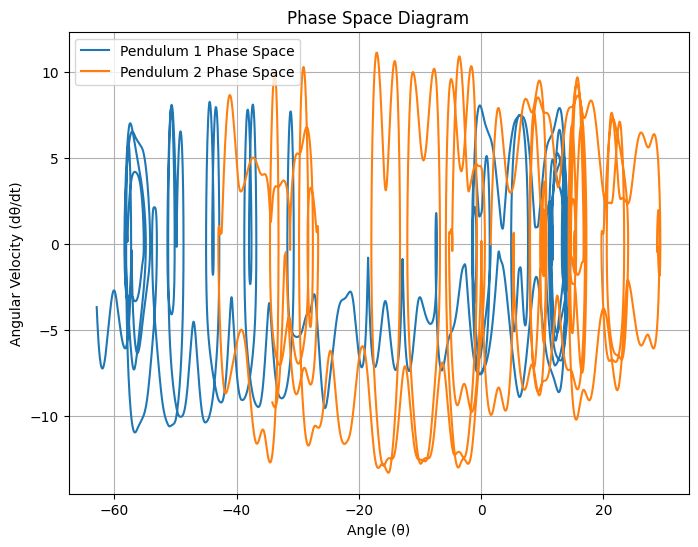

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(theta1, z1, label="Pendulum 1 Phase Space")
plt.plot(theta2, z2, label="Pendulum 2 Phase Space")
plt.xlabel("Angle (θ)")
plt.ylabel("Angular Velocity (dθ/dt)")
plt.title("Phase Space Diagram")
plt.legend()
plt.grid()
plt.show()


## Energy Flow: Conserving Complexity
The total mechanical energy of the double pendulum is conserved in the absence of damping. This plot shows how energy is exchanged between kinetic and potential forms, illustrating the flow of information in the system.


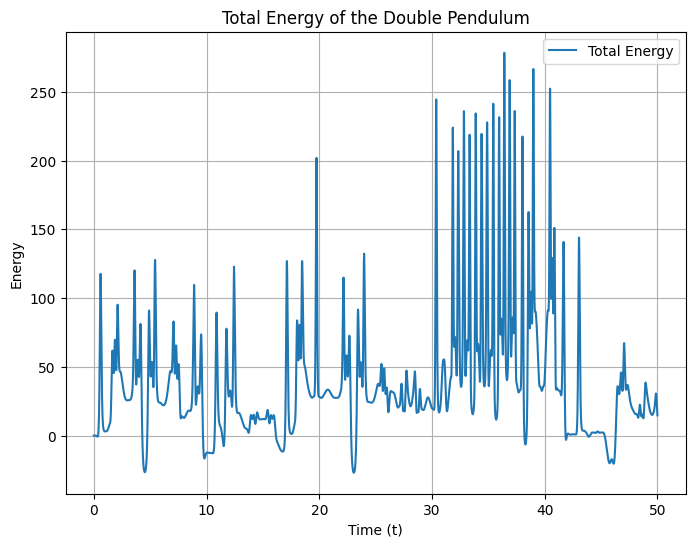

In [14]:
def energy(theta1, theta2, z1, z2):
    KE1 = 0.5 * m1 * (L1 * z1)**2
    KE2 = 0.5 * m2 * ((L1 * z1)**2 + (L2 * z2)**2 + 2 * L1 * L2 * z1 * z2 * np.cos(theta1 - theta2))
    PE1 = -m1 * g * L1 * np.cos(theta1)
    PE2 = -m2 * g * (L1 * np.cos(theta1) + L2 * np.cos(theta2))
    return KE1 + KE2 + PE1 + PE2

total_energy = energy(theta1, theta2, z1, z2)

plt.figure(figsize=(8, 6))
plt.plot(t_eval, total_energy, label="Total Energy")
plt.xlabel("Time (t)")
plt.ylabel("Energy")
plt.title("Total Energy of the Double Pendulum")
plt.legend()
plt.grid()
plt.show()
